In [ ]:
#################### Required Library #####################
import numpy as np
import pandas as pd


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1=pd.read_csv('/content/email.csv', usecols=["ques","text","Class"])

In [ ]:
df1.head(5)

,ques,text,Class
0,1,"25, F, Undergraduate, Electrical and Electroni...",0
1,1,"39, M, Undergraduate, Engineering, Creative Di...",0
2,1,"37, M, Undergraduate, Commerce, Manufacturing ...",0
3,1,"28, M, Undergraduate, Economics, Accountant, t...",0
4,1,"36, M, Undergraduate, CSE, IT, theron.s@ghmuni...",0


Labels Distribution:
 0    1278
1    1278
Name: Class, dtype: int64


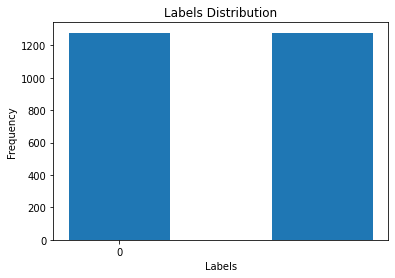

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar([0,1], df1['Class'].value_counts(), width=0.5, bottom=None, align='center', data=df1)
plt.title('Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1, step=2))
print('Labels Distribution:\n',df1['Class'].value_counts())

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df1['num_characters'] = df1['text'].apply(len)

In [ ]:
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,ques,text,Class,num_characters,num_words
0,1,"25, F, Undergraduate, Electrical and Electroni...",0,500,91
1,1,"39, M, Undergraduate, Engineering, Creative Di...",0,495,92
2,1,"37, M, Undergraduate, Commerce, Manufacturing ...",0,485,89
3,1,"28, M, Undergraduate, Economics, Accountant, t...",0,475,88
4,1,"36, M, Undergraduate, CSE, IT, theron.s@ghmuni...",0,462,88


In [ ]:
df1

,ques,text,Class,num_characters,num_words
0,1,"25, F, Undergraduate, Electrical and Electroni...",0,500,91
1,1,"39, M, Undergraduate, Engineering, Creative Di...",0,495,92
2,1,"37, M, Undergraduate, Commerce, Manufacturing ...",0,485,89
3,1,"28, M, Undergraduate, Economics, Accountant, t...",0,475,88
4,1,"36, M, Undergraduate, CSE, IT, theron.s@ghmuni...",0,462,88
...,...,...,...,...,...
2551,31,"39, F, Masters, Finance, Business, Blackboard ...",1,345,67
2552,31,"29, M, Undergraduate, Information Technology, ...",1,375,69
2553,31,"29, M, Undergraduate, Computer Science, Techno...",1,372,69
2554,31,"29, M, Undergraduate, Engineering, employee, B...",1,355,67


In [ ]:
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,ques,text,Class,num_characters,num_words,num_sentences
0,1,"25, F, Undergraduate, Electrical and Electroni...",0,500,91,5
1,1,"39, M, Undergraduate, Engineering, Creative Di...",0,495,92,5
2,1,"37, M, Undergraduate, Commerce, Manufacturing ...",0,485,89,5
3,1,"28, M, Undergraduate, Economics, Accountant, t...",0,475,88,5
4,1,"36, M, Undergraduate, CSE, IT, theron.s@ghmuni...",0,462,88,5


In [ ]:
df1[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2556.000000,2556.000000,2556.000000
mean,595.475352,114.758998,3.417058
std,324.824968,57.873333,1.978497
min,235.000000,55.000000,1.000000
25%,388.500000,71.000000,2.000000
50%,509.500000,99.500000,3.000000
75%,675.000000,145.000000,4.250000
max,1567.000000,281.000000,8.000000


In [ ]:
# genuine
df1[df1['Class'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1278.000000,1278.000000,1278.000000
mean,569.210485,116.492175,3.833333
std,177.386500,34.230842,1.772385
min,235.000000,59.000000,2.000000
25%,473.000000,89.000000,2.000000
50%,618.500000,129.500000,3.500000
75%,678.000000,146.000000,5.000000
max,845.000000,160.000000,7.000000


In [ ]:
#phishing
df1[df1['Class'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1278.000000,1278.000000,1278.000000
mean,621.740219,113.025822,3.000782
std,422.206593,74.320288,2.084172
min,318.000000,55.000000,1.000000
25%,355.000000,68.000000,1.000000
50%,416.000000,81.000000,2.500000
75%,671.000000,124.000000,4.000000
max,1567.000000,281.000000,8.000000


In [ ]:
import seaborn as sns

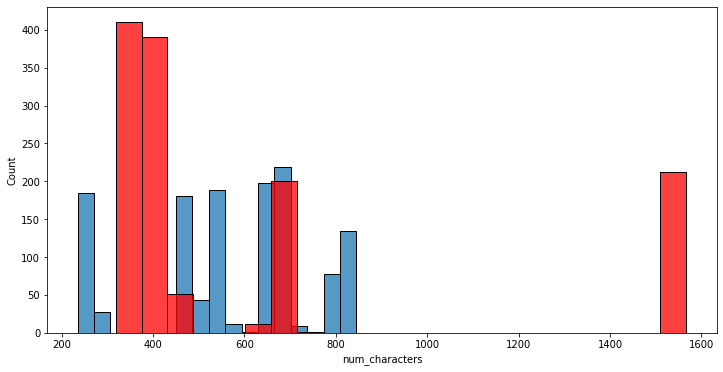

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['Class'] == 0]['num_characters'])
sns.histplot(df1[df1['Class'] == 1]['num_characters'],color='red')

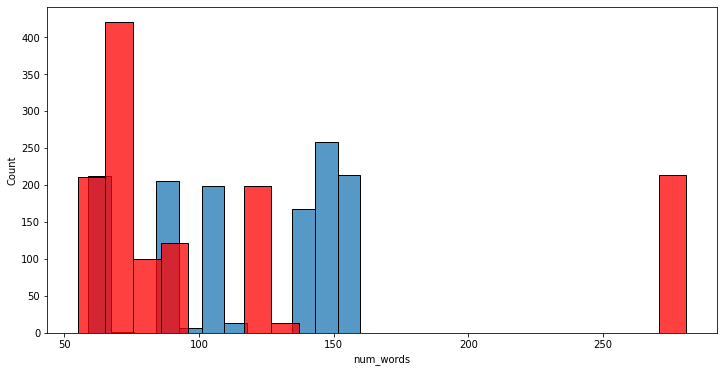

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['Class'] == 0]['num_words'])
sns.histplot(df1[df1['Class'] == 1]['num_words'],color='red')

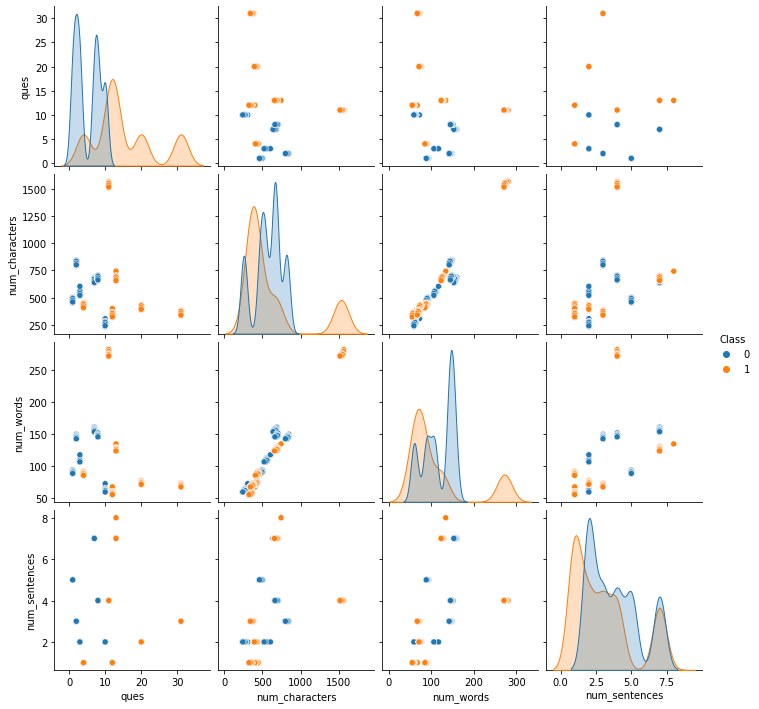

In [ ]:
sns.pairplot(df1,hue='Class')

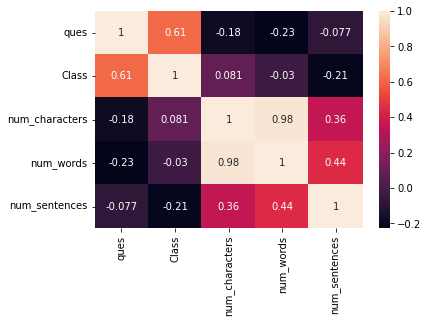

In [ ]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Down


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
############## Data Cleaning #####################
#Functions for Preprocessing the Dataset
##############################text = re.sub(r'[?|!|\'|"|#|,|)|(|\|/$%\n\t.:;""‘’]',r'',text) ######################
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from textblob import Word
nltk.download('wordnet')

def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

def lemmatize(text):
    return ' '.join([Word(word).lemmatize() for word in text.split()])

import re
def clean_text(string):
  #clean=re.sub('@[a-zA-Z0-9_]+', '', string) #removing usernames from tweets
  #clean=re.sub('<br>', '', string)
  clean=re.sub('<[a-zA-Z]>', '', string)
  clean=re.sub('</[a-zA-Z]>', '', clean)
  clean=re.sub('<a href="', '', clean)
  clean=re.sub('" target="_blank" rel="noopener noreferrer">', '', clean)
  clean=re.sub('">', '', string)
  clean=re.sub('[\n]',' ',clean) #remove newline character
  #clean=re.sub('Move to spam',' ',clean)
  #clean=re.sub('Based upon senders email address',' ',clean)
  clean=re.sub('[^a-zA-Z0-9\']',' ',clean) #remove non alphabetic characters
  clean = re.sub(r'[?|!|\'|"|#|,|)|(|\|/$%\n\t.:;""‘’]',r'',clean)
  clean = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', clean)
  clean=mystopwords(clean) #remove stopwords
  clean=lemmatize(clean)
  clean=' '.join(clean.split()) #removing unnecessary spaces
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
texts=[]
classes=[]
for i in range(len(df1)):
  classes.append(df1['Class'][i])
  texts.append(clean_text(df1['text'][i]))
'''  
#Cleaning the test data 
test_tweets=[]
for i in range(len(df2)):
  test_tweets.append(clean_text(df2['textt'][i]))
  '''

"  \n#Cleaning the test data \ntest_tweets=[]\nfor i in range(len(df2)):\n  test_tweets.append(clean_text(df2['textt'][i]))\n  "

In [ ]:
print('Text before cleaning: ',df1['text'][1])
print('Text after cleaning: ',texts[1])

Text before cleaning:  39, M, Undergraduate, Engineering, Creative Director, Full time, theron.s@ghmuniversity.ac.in, Gold Pendant Lost in North Campus, Monday, September 9, 2019, 1:15:27 PM, all, A personal gold pendant got lost today in North Campus. The photo of the same is attached. If any one is able to find it please inform me or security office. Thank you in advance. - Theron Steave Associate Professor G. H. Mehta University https://images-static.nykaa.com/media/catalog/product/j/w/jwj381_1.jpg Photo , 96,
Text after cleaning:  39 M Undergraduate Engineering Creative Director Full time theron ghmuniversity ac Gold Pendant Lost North Campus Monday September 9 2019 1 15 27 PM personal gold pendant got lost today North Campus The photo attached If one able find please inform security office Thank advance Theron Steave Associate Professor H Mehta University http image static nykaa com medium catalog product jwj381 1 jpg Photo 96


Text(0.5, 1.0, 'Top 100 Words in the phishing')

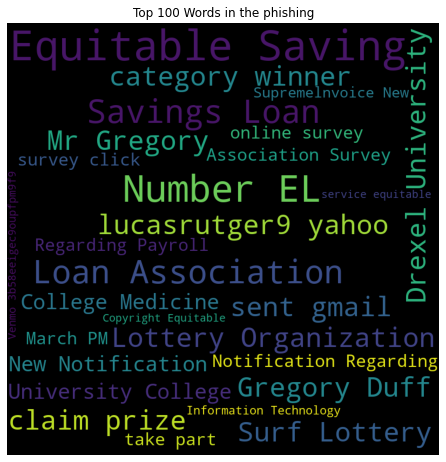

In [ ]:
from wordcloud import WordCloud, STOPWORDS  
hate=[]
for i in range(len(texts)): #getting the hate tweets
  if classes[i]== 1:
    hate.append(texts[i])
h=' '.join(hate)  #transforming the list of hate tweets into a single sentence
h=mystopwords(h)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20,max_words=100).generate(h)
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top 100 Words in the phishing')

In [ ]:
from sklearn.model_selection import train_test_split
train_texts=pd.read_csv('/content/data4ml - train.csv',  usecols = ['text'])
val_texts=pd.read_csv('/content/data4ml - test.csv',  usecols = ['text'])
train_classes=pd.read_csv('/content/data4ml - train.csv',  usecols = ['Class'])
val_classes=pd.read_csv('/content/data4ml - test.csv',  usecols = ['Class'])

#train_texts, val_texts, train_classes, val_classes = train_test_split(df1['text'],df1['Class'], test_size=0.2, stratify=df1['ques'])
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(train_classes)

      Class
0         1
1         1
2         1
3         1
4         1
...     ...
1699      1
1700      1
1701      1
1702      1
1703      1

[1704 rows x 1 columns]


In [ ]:
train=pd.read_csv('/content/data4ml - train.csv',  usecols = ['text','Class'])
val=pd.read_csv('/content/data4ml - test.csv',  usecols = ['text','Class'])


In [ ]:
#print('Length of the Training Set: ',len(df1))
print('No. of Training Examples: ',len(train_texts))
print('No. of Validation Examples: ',len(val_texts))

#train_texts['text'] = train_texts['text'].apply(clean_text)
#val_texts['text'] = val_texts['text'].apply(clean_text)

No. of Training Examples:  1704
No. of Validation Examples:  852


In [ ]:
texts=[]
classes=[]
for i in range(len(train_classes)):
  #classes.append(train_classes['Class'][i])
  texts.append(clean_text(train_texts['text'][i]))
  train_texts['text'][i]=texts[i]

texts=[]
classes=[]
for i in range(len(train)):
  #classes.append(train_classes['Class'][i])
  texts.append(clean_text(train['text'][i]))
  train['text'][i]=texts[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
print('Text before cleaning: ',train_texts['text'][111])
print('Text after cleaning: ',texts[111])

Text before cleaning:  30 Male Undergraduate ACCOUNTANT FINANCE Drexel University College Medicine acct drexxelmed edu New Notification Regarding Your Payroll Thursday March 31 2022 4 40 05 PM 1 New Notification Regarding Your Payroll www drexelmed edu hr payroll form form1 exe PayRoll Pdf Thank You Drexel University College Medicine 52
Text after cleaning:  30 Male Undergraduate ACCOUNTANT FINANCE Drexel University College Medicine acct drexxelmed edu New Notification Regarding Your Payroll Thursday March 31 2022 4 40 05 PM 1 New Notification Regarding Your Payroll www drexelmed edu hr payroll form form1 exe PayRoll Pdf Thank You Drexel University College Medicine 52


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top  Words in the phishing')

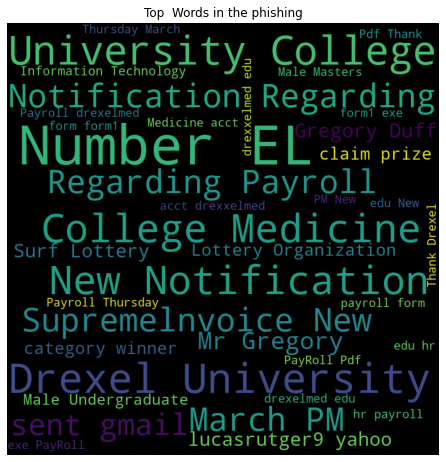

In [ ]:
from wordcloud import WordCloud, STOPWORDS  
phish=[]
for i in range(len(train_texts)): #getting the hate tweets
  if train_classes['Class'][i]== 1:
    phish.append(train_texts['text'][i])
h=' '.join(phish)  #transforming the list of hate tweets into a single sentence
h=mystopwords(h)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20,max_words=100).generate(h)
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top  Words in the phishing')

Text(0.5, 1.0, 'Top 100 Words in the genuine')

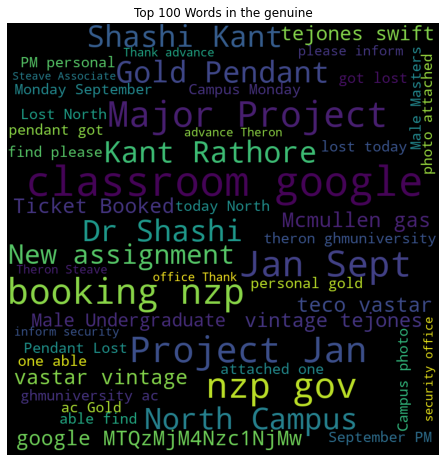

In [ ]:
from wordcloud import WordCloud, STOPWORDS  
phish=[]
for i in range(len(train_texts)): #getting the hate tweets
  if train_classes['Class'][i]== 0:
    phish.append(train_texts['text'][i])
h=' '.join(phish)  #transforming the list of hate tweets into a single sentence
h=mystopwords(h)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20,max_words=100).generate(h)
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top 100 Words in the genuine')

In [ ]:
texts2=[]
classes=[]
for i in range(len(val_classes)):
  #classes.append(train_classes['Class'][i])
  texts2.append(clean_text(val_texts['text'][i]))
  val_texts['text'][i]=texts2[i]

texts2=[]
classes=[]
for i in range(len(val)):
  #classes.append(train_classes['Class'][i])
  texts2.append(clean_text(val['text'][i]))
  val['text'][i]=texts2[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
print('Text before cleaning: ',len(val_texts))
print('Text after cleaning: ',len(val))

Text before cleaning:  852
Text after cleaning:  852


In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#embedding_dim = 200
max_length = 10
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=49999

tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts['text'])

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Size of Vocabulary: ',vocab_size)

train_sequences = tokenizer.texts_to_sequences(train_texts['text'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_texts['text'])
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#test_sequences = tokenizer.texts_to_sequences(test_tweets)
#test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#train_classes=np.expand_dims(train_classes, axis=1)
#val_classes=np.expand_dims(val_classes, axis=1)

Size of Vocabulary:  652


In [ ]:
print(train_padded)

[[417  62  17 ...  71  37  72]
 [410  12  17 ... 425  71  37]
 [414  12  17 ...  37  72  73]
 ...
 [407  12  17 ...  54 121 122]
 [407  12  17 ... 122 123  70]
 [ 59  62  31 ... 122 123  70]]


In [ ]:
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Validation Data: ',val_padded.shape)
print('Dimension of Training Labels: ',train_classes.shape)
print('Dimension of Validation Labels: ',val_classes.shape)
#print('Dimension of Test Data: ',test_padded.shape)

Dimension of Training Data:  (1704, 10)
Dimension of Validation Data:  (852, 10)
Dimension of Training Labels:  (1704, 1)
Dimension of Validation Labels:  (852, 1)


In [ ]:
#df1['clean_text'] = df1['text'].apply(clean_text)
#df1['clean_text'] = df1['text'].apply(clean_text)

In [ ]:
df1.head()

,ques,text,Class,num_characters,num_words,num_sentences
0,1,"25, F, Undergraduate, Electrical and Electroni...",0,500,91,5
1,1,"39, M, Undergraduate, Engineering, Creative Di...",0,495,92,5
2,1,"37, M, Undergraduate, Commerce, Manufacturing ...",0,485,89,5
3,1,"28, M, Undergraduate, Economics, Accountant, t...",0,475,88,5
4,1,"36, M, Undergraduate, CSE, IT, theron.s@ghmuni...",0,462,88,5


In [ ]:
phishing_corpus = []
for msg in train[train['Class'] == 1]['text'].tolist():
    for word in msg.split():
        phishing_corpus.append(word)
for msg in val[val['Class'] == 1]['text'].tolist():
    for word in msg.split():
        phishing_corpus.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


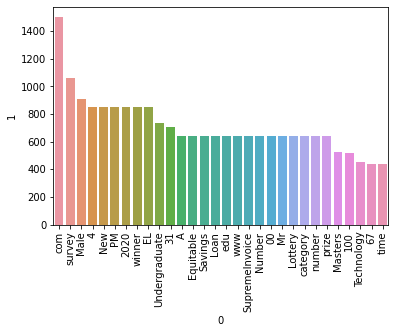

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(phishing_corpus).most_common(30))[0],pd.DataFrame(Counter(phishing_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
genuine_corpus = []
for msg in train[train['Class'] == 0]['text'].tolist():
    for word in msg.split():
        genuine_corpus.append(word)
for msg in val[val['Class'] == 0]['text'].tolist():
    for word in msg.split():
        genuine_corpus.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


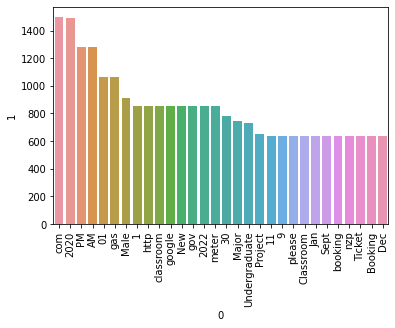

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(genuine_corpus).most_common(30))[0],pd.DataFrame(Counter(genuine_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##################### Mayank ##########################################
embeddings_index1 = {}
embeddings_index2 = {}
embeddings_index3 = {}
embeddings_index4 = {}

import numpy as np
with open('/content/drive/MyDrive/Glove/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index1[word] = coefs

with open('/content/drive/MyDrive/Glove/glove.6B.200d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index2[word] = coefs



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping


In [ ]:
embeddings_index3 = {}
f = open('/content/drive/MyDrive/Glove/glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index3[word] = coefs
f.close()

2196017it [04:30, 8127.59it/s]


In [ ]:
'''
with open('/content/drive/MyDrive/Glove/glove.840B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[:2], dtype='float32')
        embeddings_index3[word] = coefs
'''

"\nwith open('/content/drive/MyDrive/Glove/glove.840B.300d.txt') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[:2], dtype='float32')\n        embeddings_index3[word] = coefs\n"

In [ ]:
'''
embeddings_index1 = {}
embeddings_index2 = {}
embeddings_index3 = {}
embeddings_index4 = {}

import numpy as np
with open('/content/drive/MyDrive/Copy of glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index1[word] = coefs

with open('/content/drive/MyDrive/Copy of glove.6B.200d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index2[word] = coefs

with open('/content/drive/MyDrive/Copy of glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index3[word] = coefs
'''

"\nembeddings_index1 = {}\nembeddings_index2 = {}\nembeddings_index3 = {}\nembeddings_index4 = {}\n\nimport numpy as np\nwith open('/content/drive/MyDrive/Copy of glove.6B.100d.txt') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype='float32')\n        embeddings_index1[word] = coefs\n\nwith open('/content/drive/MyDrive/Copy of glove.6B.200d.txt') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype='float32')\n        embeddings_index2[word] = coefs\n\nwith open('/content/drive/MyDrive/Copy of glove.6B.300d.txt') as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype='float32')\n        embeddings_index3[word] = coefs\n"

In [ ]:
import numpy as np

#np.size(embeddings_index1)
#embeddings_index2.shape()
#embeddings_index3.shape()

In [ ]:
embedding_dim1=100
embedding_dim2 = 200
embedding_dim3=300

embeddings_matrix1 = np.zeros((vocab_size, embedding_dim1))
for word, i in word_index.items():
    embedding_vector = embeddings_index1.get(word)
    if embedding_vector is not None:
        embeddings_matrix1[i-1] = embedding_vector
       
        
embeddings_matrix2 = np.zeros((vocab_size, embedding_dim2))
for word, i in word_index.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        embeddings_matrix2[i-1] = embedding_vector

embeddings_matrix3 = np.zeros((vocab_size, embedding_dim3))
for word, i in word_index.items():
    embedding_vector = embeddings_index3.get(word)
    if embedding_vector is not None:
        embeddings_matrix3[i-1] = embedding_vector

In [ ]:
print('Shape of the Embeddings Matrix (GloVe_100): ',embeddings_matrix1.shape)
print('Shape of the Embeddings Matrix (GloVe_200): ',embeddings_matrix2.shape)
print('Shape of the Embeddings Matrix (GloVe_300): ',embeddings_matrix3.shape)

Shape of the Embeddings Matrix (GloVe_100):  (652, 100)
Shape of the Embeddings Matrix (GloVe_200):  (652, 200)
Shape of the Embeddings Matrix (GloVe_300):  (652, 300)


In [ ]:
import tensorflow as tf
model1_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim1, input_length=max_length, weights = [embeddings_matrix1], trainable = False),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(128,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(128,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.compat.v1.keras.layers.CuDNNLSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=3, mode='auto')
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history1=model1_lstm.fit(train_padded, 
                    train_classes, 
                    epochs=num_epochs, 
                    batch_size=2, 
                    validation_data=(val_padded,val_classes),
                    callbacks=[reduce],
                    verbose=1)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim1 ,input_length = max_length,weights = [embeddings_matrix1], trainable = True )) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 100)           65200     
                                                                 
 flatten_6 (Flatten)         (None, 1000)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                32032     
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 97,265
Trainable params: 97,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(train_padded, train_classes,
                   epochs = 10,
                   batch_size = 512,
                   validation_data = (val_padded, val_classes))
#model.save_weights("pre_trained_glove_model.h5")  

Epoch 1/10
4/4 [==============================] - 1s 75ms/step - loss: 0.5990 - acc: 0.6209 - val_loss: 0.6221 - val_acc: 0.6138
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.2296 - acc: 0.9754 - val_loss: 0.5969 - val_acc: 0.6338
Epoch 3/10
4/4 [==============================] - 0s 23ms/step - loss: 0.1223 - acc: 0.9877 - val_loss: 0.8204 - val_acc: 0.5129
Epoch 4/10
4/4 [==============================] - 0s 23ms/step - loss: 0.0840 - acc: 0.9941 - val_loss: 0.7455 - val_acc: 0.5505
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0506 - acc: 0.9982 - val_loss: 0.9576 - val_acc: 0.5035
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0366 - acc: 0.9977 - val_loss: 0.7201 - val_acc: 0.5869
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 0.0258 - acc: 0.9988 - val_loss: 0.5962 - val_acc: 0.7101
Epoch 8/10
4/4 [==============================] - 0s 16ms/step - loss: 0.0201 - acc: 0.9977 - val

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
from keras.layers import Embedding
import keras.backend as K
embedding_layer = Embedding(vocab_size, embedding_dim1 ,input_length = max_length,weights = [embeddings_matrix1], trainable = False)

def precision(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) 
    precision = true_positives / (predicted_positives + K.epsilon()) 
    return precision

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) 
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) 
    recall = true_positives / (possible_positives + K.epsilon()) 
    return recall 

In [ ]:
batch_size = 128

model = Sequential()

model.add(embedding_layer)

model.add(LSTM(64))

model.add(Dropout(0.50))

model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs

model.compile('adam', 'binary_crossentropy', metrics=['accuracy', precision, recall])

print('Train...')

model.fit(train_padded, train_classes,
                   epochs = 10,
                   batch_size = 512,
                   validation_data = (val_padded, val_classes))


Train...
Epoch 1/10
4/4 [==============================] - 4s 284ms/step - loss: 0.6168 - accuracy: 0.7336 - precision: 0.7442 - recall: 0.7645 - val_loss: 0.6597 - val_accuracy: 0.5211 - val_precision: 0.5357 - val_recall: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 71ms/step - loss: 0.5088 - accuracy: 0.9196 - precision: 0.9183 - recall: 0.9381 - val_loss: 0.6423 - val_accuracy: 0.5469 - val_precision: 0.5493 - val_recall: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 86ms/step - loss: 0.4085 - accuracy: 0.9677 - precision: 0.9631 - recall: 0.9754 - val_loss: 0.6361 - val_accuracy: 0.5552 - val_precision: 0.5518 - val_recall: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 80ms/step - loss: 0.3133 - accuracy: 0.9824 - precision: 0.9809 - recall: 0.9883 - val_loss: 0.6567 - val_accuracy: 0.5469 - val_precision: 0.5481 - val_recall: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 79ms/step - loss: 0.2274 - accuracy: 0.9853 - precisi

In [ ]:
gnb.fit(train_padded,train_classes)
y_pred1 = gnb.predict(val_padded)
print(accuracy_score(val_classes,y_pred1))
print(confusion_matrix(val_classes,y_pred1))
print(precision_score(val_classes,y_pred1))

0.5
[[410  16]
 [410  16]]
0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
mnb.fit(train_padded,train_classes)
y_pred2 = mnb.predict(val_padded)
print(accuracy_score(val_classes,y_pred2))
print(confusion_matrix(val_classes,y_pred2))
print(precision_score(val_classes,y_pred2))

0.4096244131455399
[[329  97]
 [406  20]]
0.17094017094017094


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
bnb.fit(train_padded,train_classes)
y_pred3 = bnb.predict(val_padded)
print(accuracy_score(val_classes,y_pred3))
print(confusion_matrix(val_classes,y_pred3))
print(precision_score(val_classes,y_pred3))

0.5
[[426   0]
 [426   0]]
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,train_padded,train_classes,val_padded,val_classes):
    clf.fit(train_padded,train_classes)
    y_pred = clf.predict(val_padded)
    accuracy = accuracy_score(val_classes,y_pred)
    precision = precision_score(val_classes,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,train_padded,train_classes,val_padded,val_classes)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.5, 0.5)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, train_padded,train_classes,val_padded,val_classes)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  SVC
Accuracy -  0.5
Precision -  0.5
For  KN
Accuracy -  0.57981220657277
Precision -  0.5772727272727273
For  NB
Accuracy -  0.4096244131455399
Precision -  0.17094017094017094
For  DT
Accuracy -  0.5352112676056338
Precision -  0.5245901639344263
For  LR
Accuracy -  0.4131455399061033
Precision -  0.1509433962264151


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  RF
Accuracy -  0.4694835680751174
Precision -  0.19047619047619047
For  AdaBoost
Accuracy -  0.5187793427230047
Precision -  0.5353982300884956


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  BgC
Accuracy -  0.5352112676056338
Precision -  0.5247524752475248
For  ETC
Accuracy -  0.5
Precision -  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  GBDT
Accuracy -  0.5446009389671361
Precision -  0.532312925170068
For  xgb
Accuracy -  0.4119718309859155
Precision -  0.14953271028037382


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.579812,0.577273
6,AdaBoost,0.518779,0.535398
9,GBDT,0.544601,0.532313
7,BgC,0.535211,0.524752
3,DT,0.535211,0.524590
0,SVC,0.500000,0.500000
5,RF,0.469484,0.190476
2,NB,0.409624,0.170940
4,LR,0.413146,0.150943
10,xgb,0.411972,0.149533


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.579812
1,AdaBoost,Accuracy,0.518779
2,GBDT,Accuracy,0.544601
3,BgC,Accuracy,0.535211
4,DT,Accuracy,0.535211
5,SVC,Accuracy,0.500000
6,RF,Accuracy,0.469484
7,NB,Accuracy,0.409624
8,LR,Accuracy,0.413146
9,xgb,Accuracy,0.411972


In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()